In [52]:
import Bio
from Bio import SeqIO
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import pyplot
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np
from collections import defaultdict
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import operator as op

In [53]:
seqF = SeqIO.read("S8_27F.ab1","abi")
seqR = SeqIO.read("S8_907R.ab1","abi")

In [54]:
# La función graph, grafica el phred score de cada nucleotido, con base a un esquema de colores asignado dependiendo del valor
def graph(phd):
    #fig = plt.figure(figsize=(13, 0.4), dpi=300)
    f, ax = plt.subplots(2, sharex=True,figsize=(14, 0.4), dpi=300)
    longitud = len(phd)
        
    ax[0].set_xlim(0,int(longitud))
    index = 0   
    for valor in phd:
        index += 1
        if  1<= valor <=10:
            ax[0].axvline(x=index, color='red')
        if 11< valor <=20:
            ax[0].axvline(x=index, color='yellow')
        if 21< valor <=30:
            ax[0].axvline(x=index, color='green')
        if 31< valor <=40:
            ax[0].axvline(x=index, color='darkblue')
        if 41< valor <=50:
            ax[0].axvline(x=index, color='purple')
                
        if 51< valor <=60:
            ax[0].axvline(x=index, color='pink')
        if 61< valor <=70:
            ax[0].axvline(x=index, color='black')
     
    for e in ax:
            e.label_outer()
    plt.setp(ax[0].get_yticklabels(), visible=False) 
    plt.setp(ax[1].get_yticklabels(), visible=False)
    plt.show()

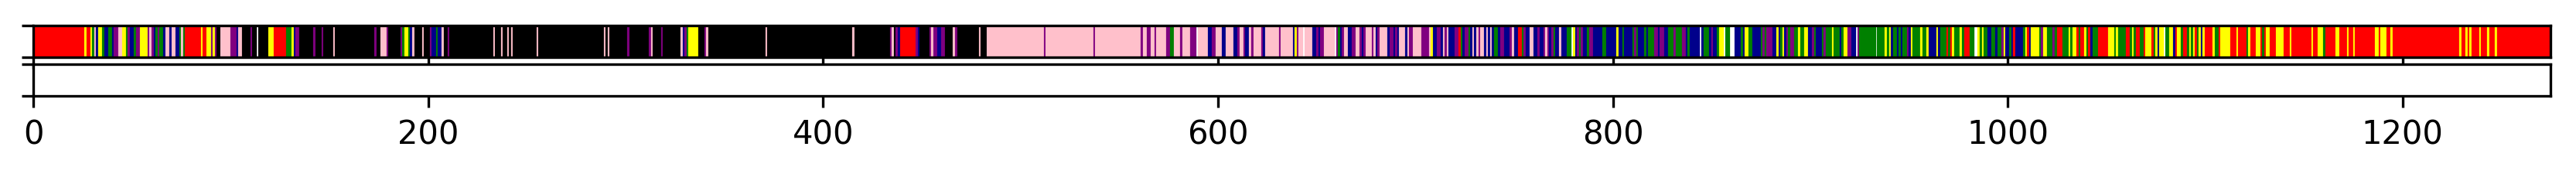

In [91]:
graph(recordF.letter_annotations['phred_quality'])

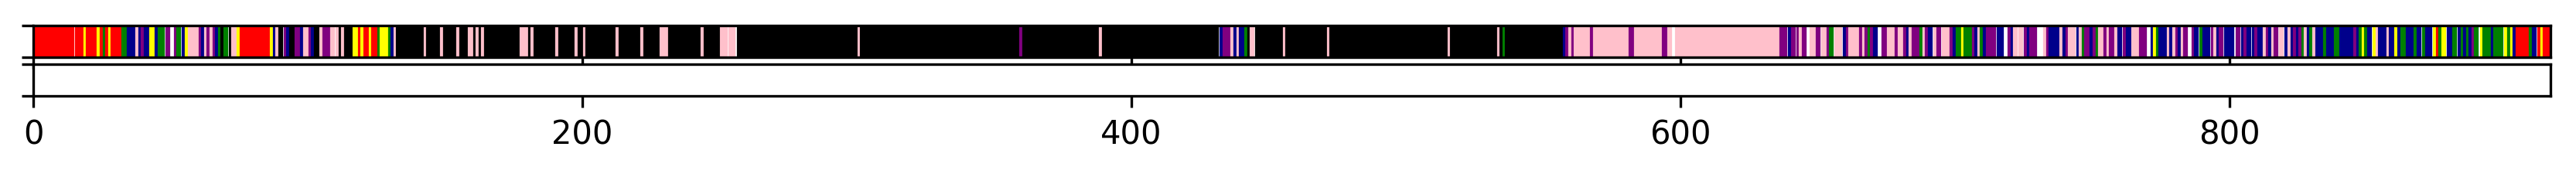

In [64]:
graph(recordR.letter_annotations['phred_quality'])

In [85]:
# La función widnow recive la secuencia y el tamaño de la ventana de trimaje asignado por el usuario, y decuerdo a esto
# la función boxpllot grafica la dispersión de los phred scores de acuerdo al tamaño de la ventana
def window(seq,size_window):
    phred_scores = seq.letter_annotations['phred_quality']
    window_scores = defaultdict(list)
    index =0
    while index +size_window < len(phred_scores):
        for base in phred_scores[index:index+size_window]:
            window_scores[index].append(base)
        index = index + size_window
        
    if (index+10) > len(phred_scores):
        for base in phred_scores[index:len(phred_scores)]:
            window_scores[index].append(base)
    return(window_scores)

def grafica_boxplot(seq,window_size):
    phred_score= seq.letter_annotations['phred_quality']
    fig, ax = plt.subplots(dpi=300)
    sns.set(rc={'figure.figsize':(30,10)})
    sns.set_style("whitegrid")
    sns.boxplot(data=[item for item in window(seq,window_size).values()])
    plt.show()
    
def trimm(seq,window_size):
    forward = [float(np.mean(window(seq,window_size)[key])) for key in window(seq,window_size).keys()]
    Reverse = forward[::-1]
    limite_trimaje = int((len(seq)/4)/window_size)
    stopF = 0
    stopR = Reverse[0]
    for i in range(1,limite_trimaje):
        if float(forward[i]) <= 20 and float(forward[i-1]) <= 20:
            stopF = i
        if float(Reverse[i]) <= 20 and float(Reverse[i+1]) <= 20:
            stopR = i
            
    desde = (stopF +1)*10
    hasta = len(seq) - (stopR + 1)*10
    new = seq[desde:hasta]
    
    return(str(new.seq),desde,hasta)

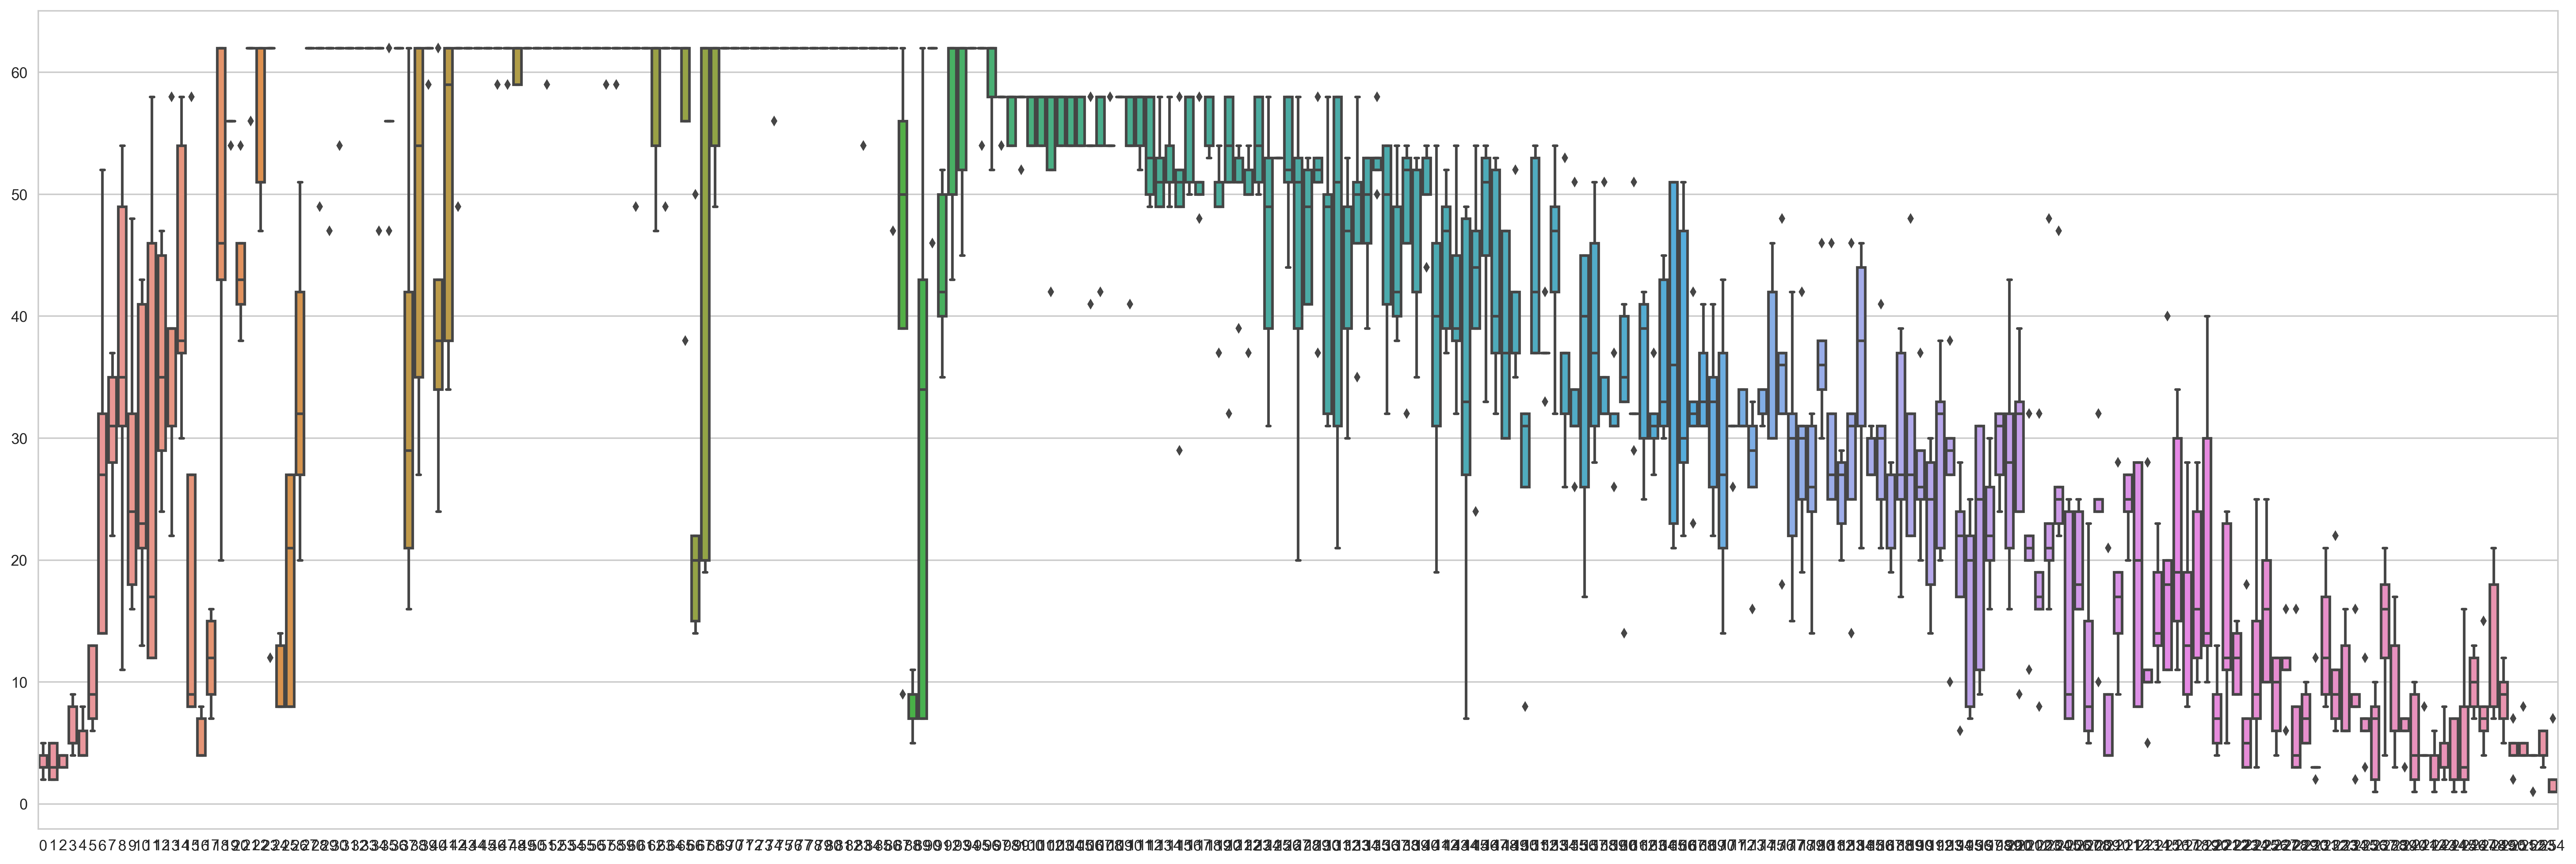

In [87]:
grafica_boxplot(seqF,5)

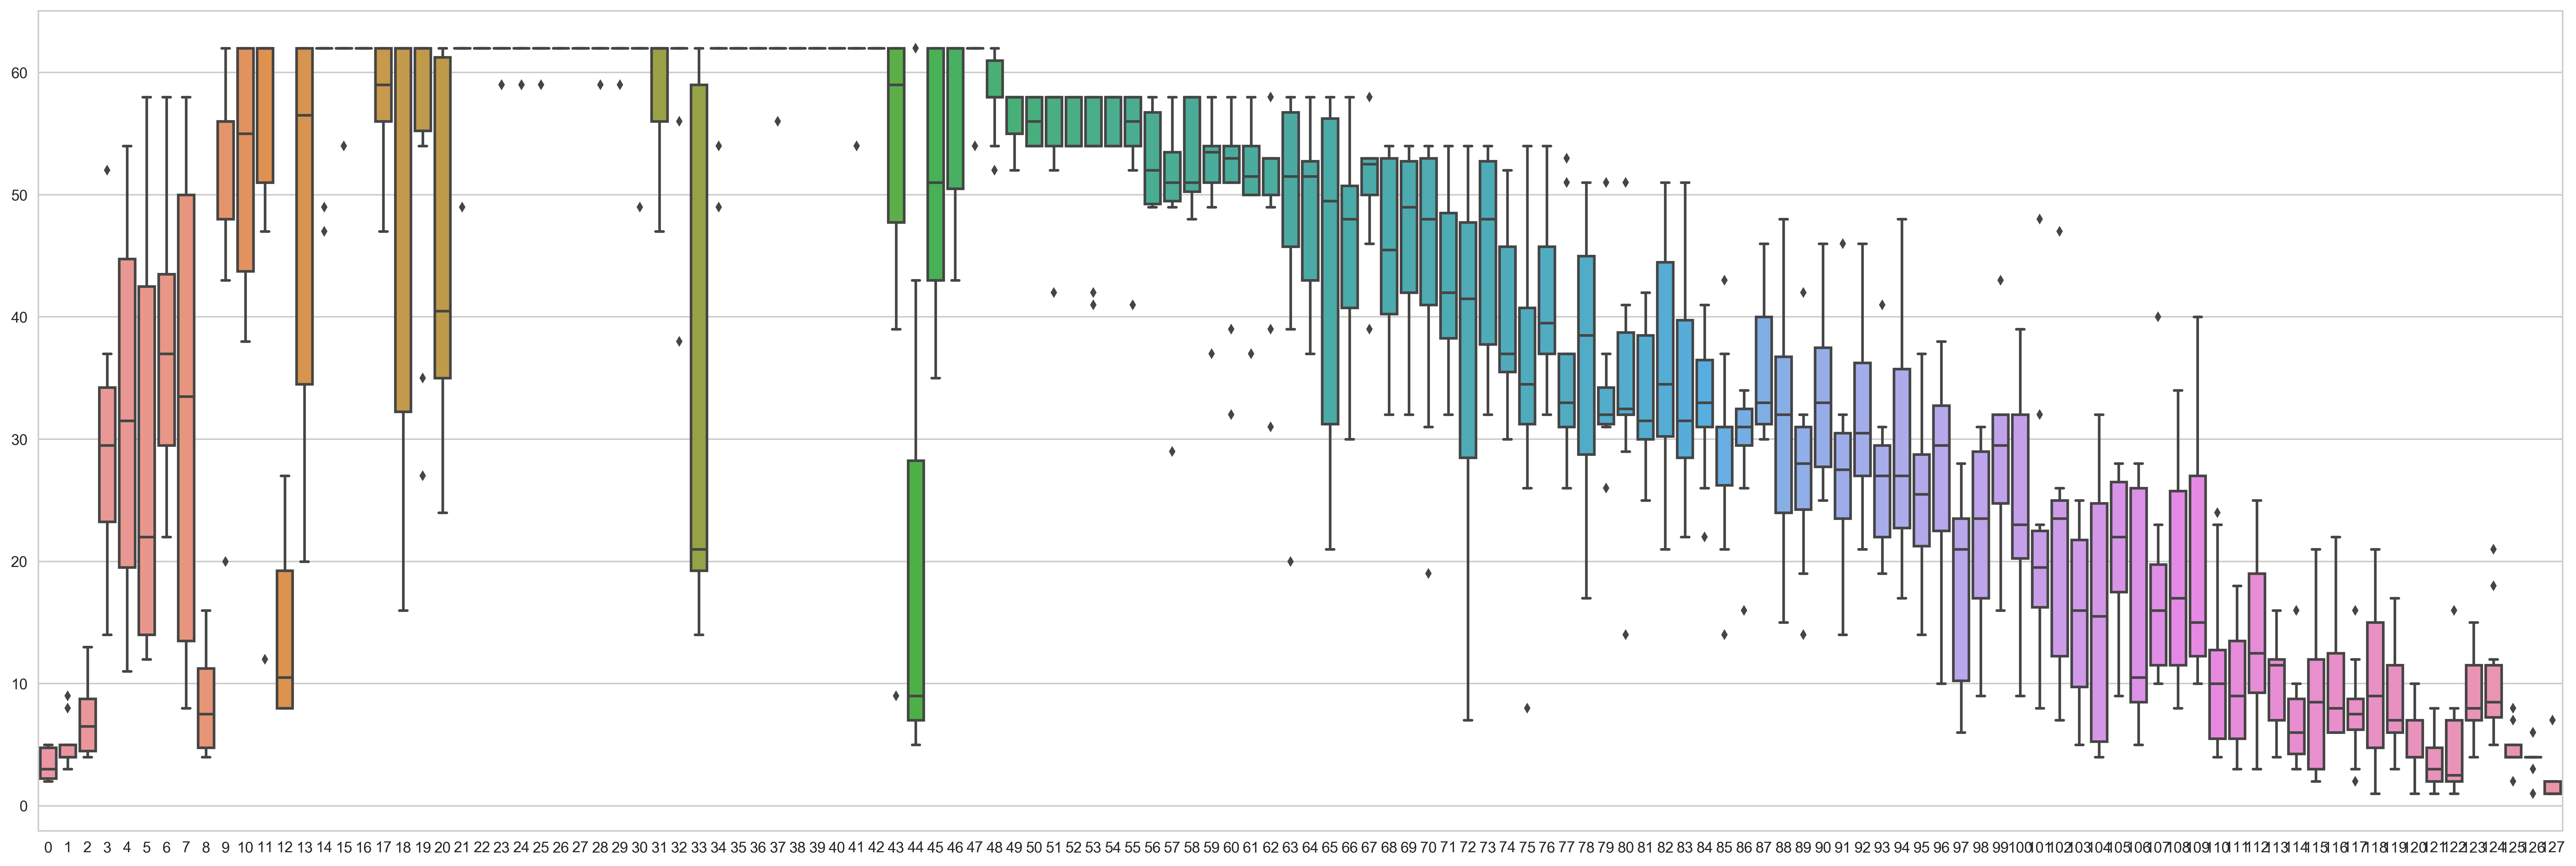

In [76]:
grafica_boxplot(seqF,10)

In [86]:
print(str(seqF.seq))
trimmed_seq, desde, hasta = trimm(seqF,10)
trimmed_seq

CGGATTGGACGACGTGACCCAGTCATGCAAGTCGACGAACTCTGGTATTGATTGGTGCTTGCATCATGATTTACATTTGAGGAGTGGCGAACTGGTGAGTAACACGTGGGAAACCTGCCCAGAAGCGGGGGATAACACCTGGAAACAGATGCTAATACCGCATAACAACTTGGACCGCATGGTCCGAGCTTGAAAGATGGCTTCGGCTATCACTTTTGGATGGTCCCGCGGCGTATTAGCTAGATGGTGGGGTAACGGCTCACCATGGCAATGATACGTAGCCGACCTGAGAGGGTAATCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCACAATGGACGAAAGTCTGATGGAGCAACGCCGCGTGAGTGAAGAAGGGTTTCGGCTCGTAAAACTCTGTTGTTAAAGAAGTTACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGTAACTGACGCTGAGGCTCGAAAGTATGGGTAGCAAACAGGATTAGATACCCTGGTAGTCCATACCGTAAACGATGAATGCTAAGTGTTGGAGGGTTTCCGCCCTTCAGTGCTGCAGCTAACGCATTAAGCATTCCGCCTGGGGAGTACGGCCGCAAGGCTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCTACGCGAAGACCTTACCAGTCTTGACATACTATGCAAAT

'GTCGACGAACTCTGGTATTGATTGGTGCTTGCATCATGATTTACATTTGAGGAGTGGCGAACTGGTGAGTAACACGTGGGAAACCTGCCCAGAAGCGGGGGATAACACCTGGAAACAGATGCTAATACCGCATAACAACTTGGACCGCATGGTCCGAGCTTGAAAGATGGCTTCGGCTATCACTTTTGGATGGTCCCGCGGCGTATTAGCTAGATGGTGGGGTAACGGCTCACCATGGCAATGATACGTAGCCGACCTGAGAGGGTAATCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCACAATGGACGAAAGTCTGATGGAGCAACGCCGCGTGAGTGAAGAAGGGTTTCGGCTCGTAAAACTCTGTTGTTAAAGAAGTTACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGTAACTGACGCTGAGGCTCGAAAGTATGGGTAGCAAACAGGATTAGATACCCTGGTAGTCCATACCGTAAACGATGAATGCTAAGTGTTGGAGGGTTTCCGCCCTTCAGTGCTGCAGCTAACGCATTAAGCATTCCGCCTGGGGAGTACGGCCGCAAGGCTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCTACGCGAAGACCTTACCAGTCTTGACATACTATGCAAATCTAGAGATTAGACGTTCCCTTCGGGACAT

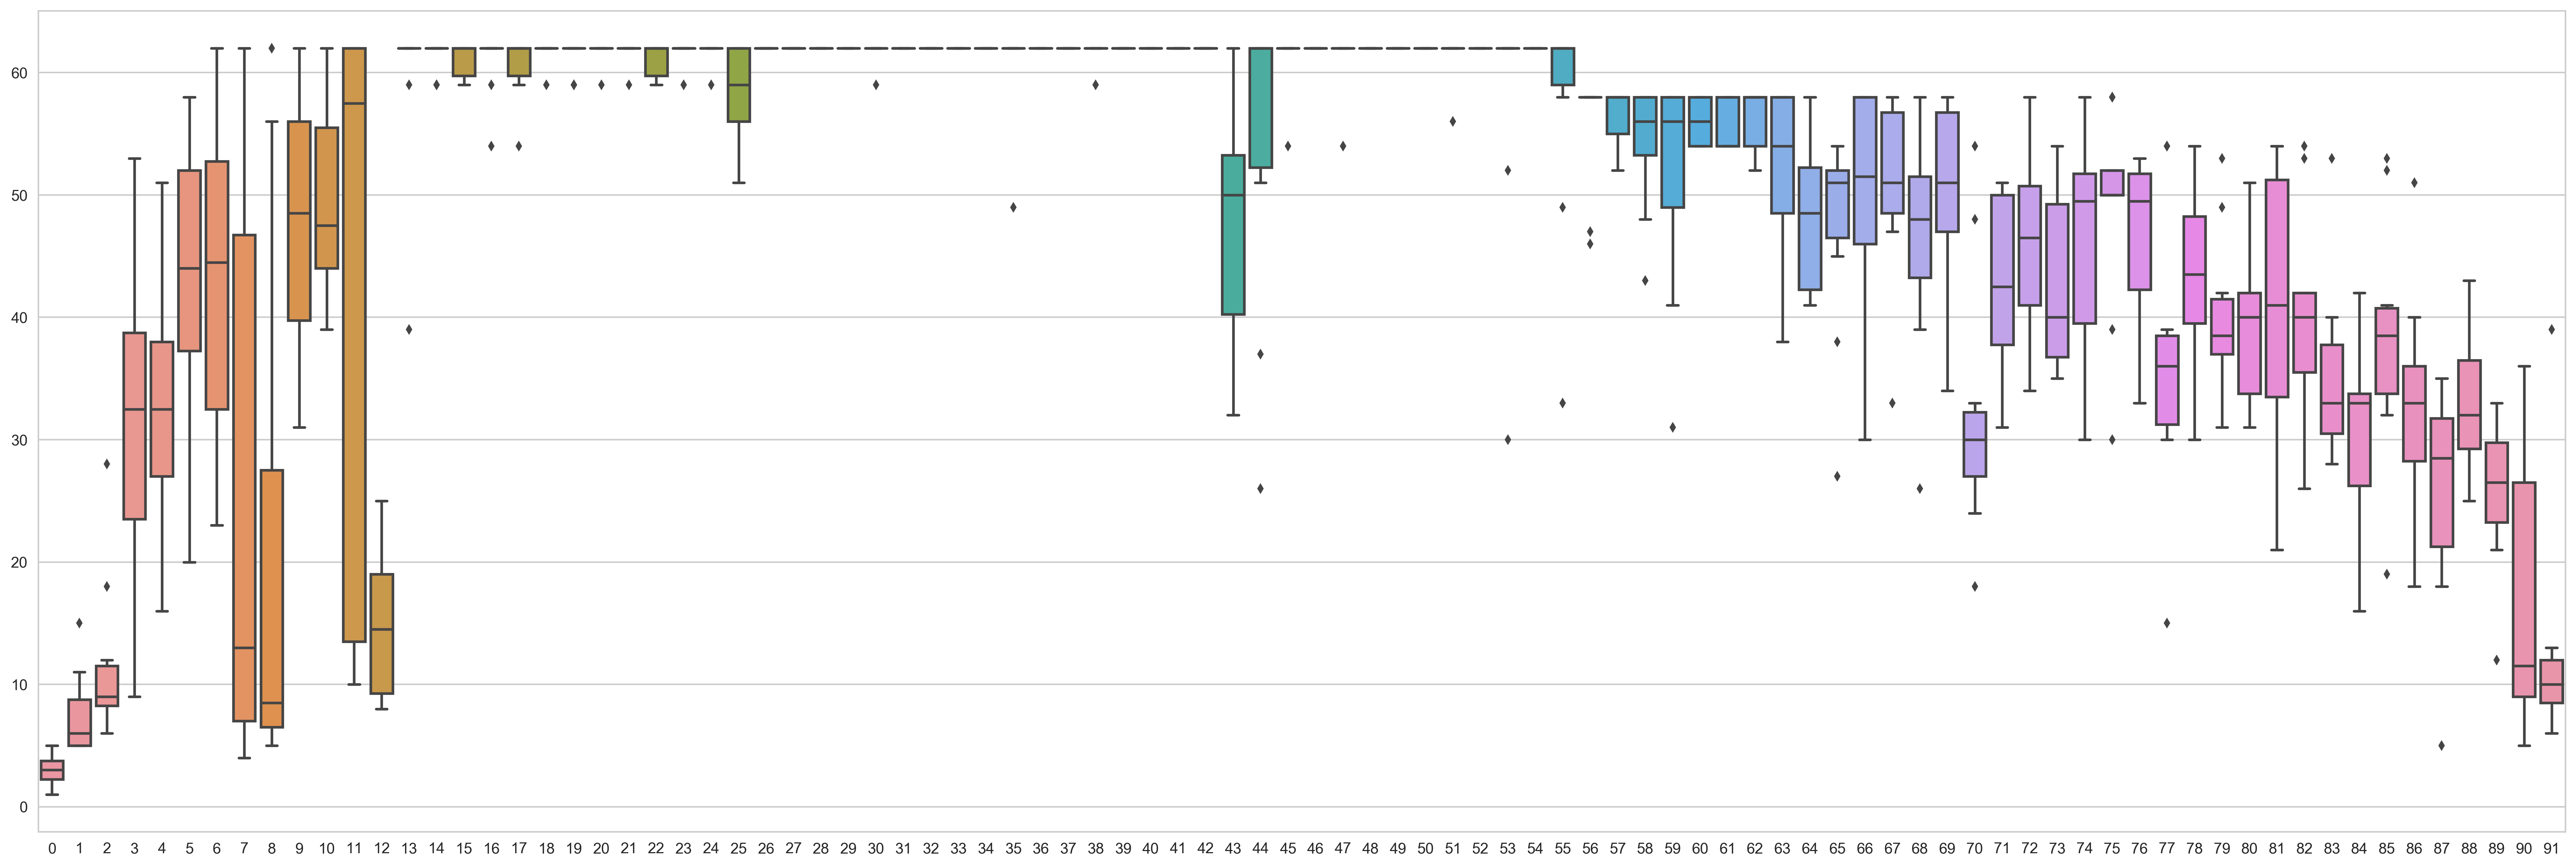

In [88]:
grafica_boxplot(seqR,10)

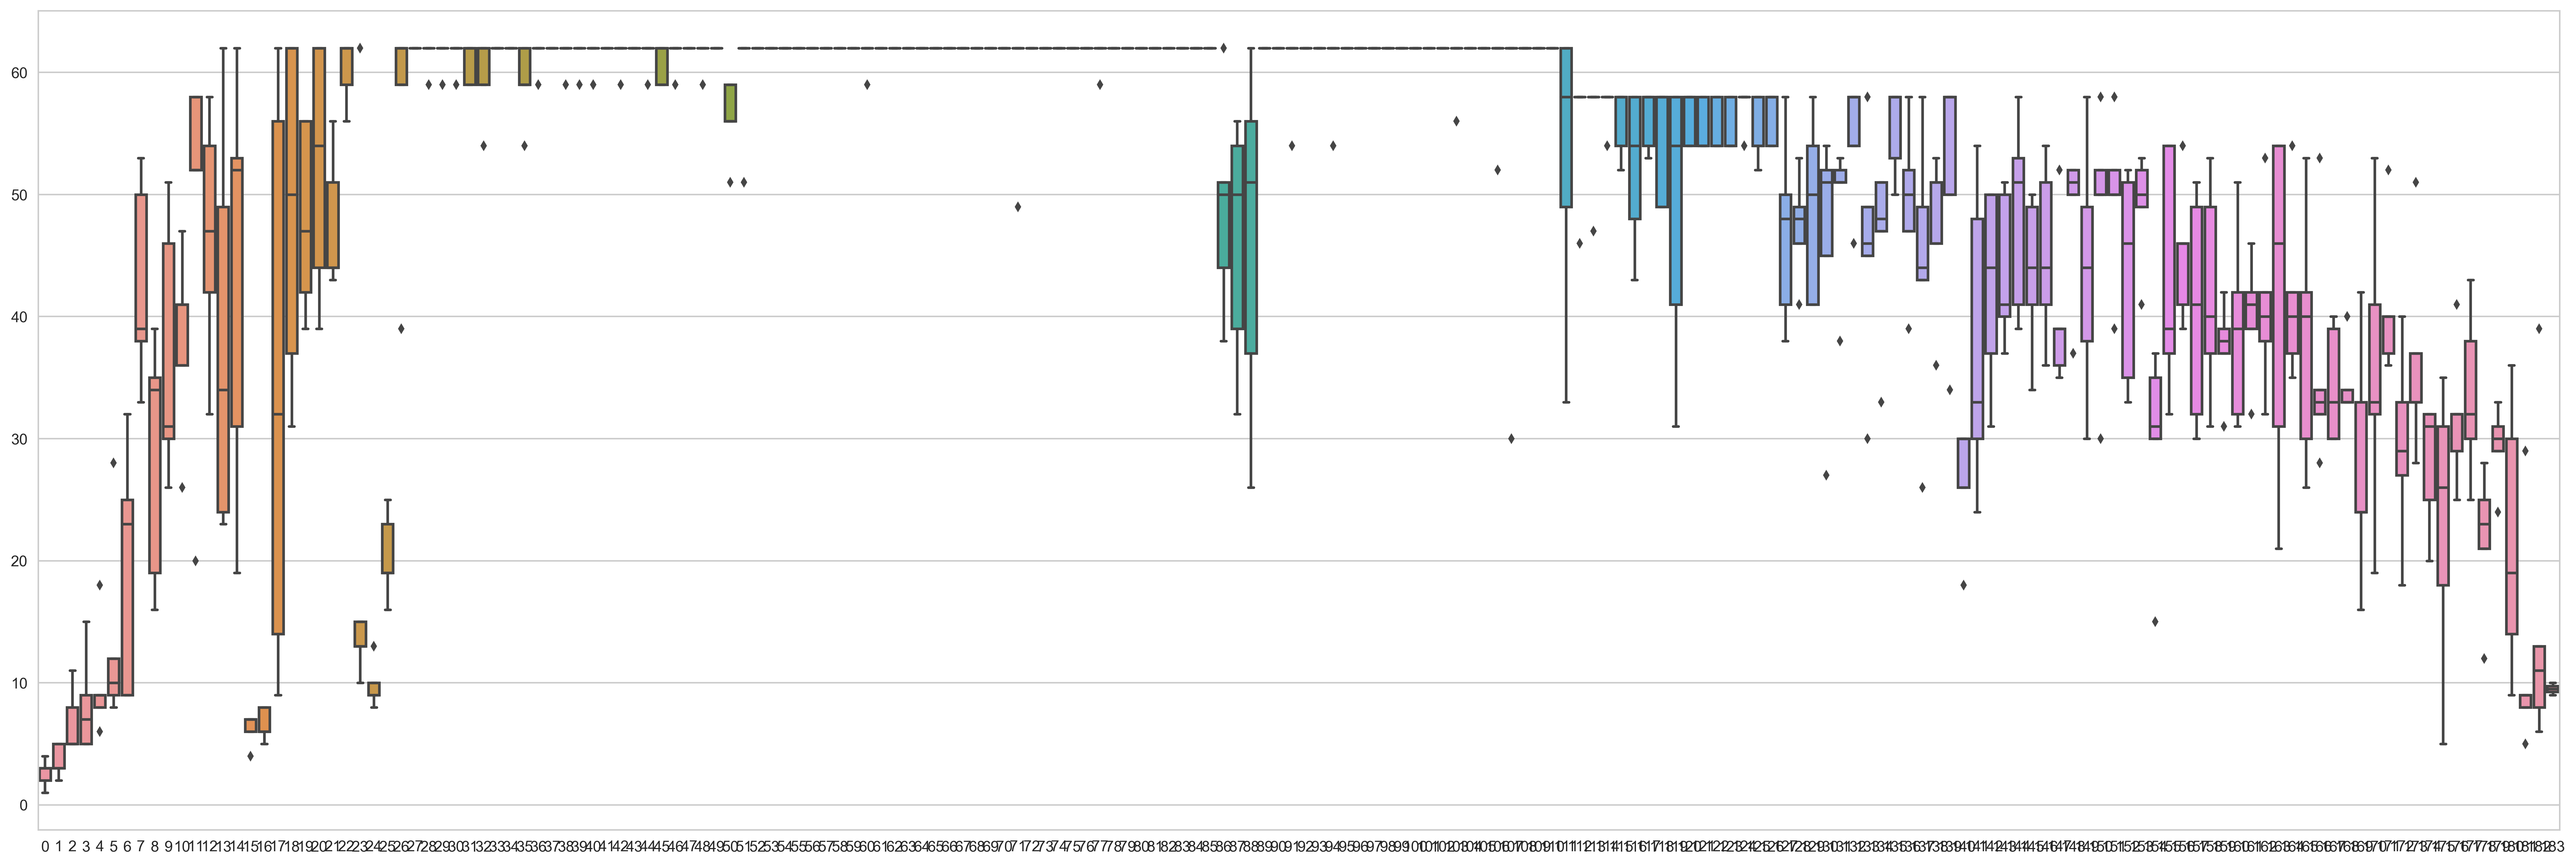

In [89]:
grafica_boxplot(seqR,5)